# Ad-Hoc Reporting

Utilize your `sqlite3` and `pandas` knowledge to query your database and generate visualizations! 

After completing your report, answer the 4 analytical questions below. Remember that we expect comprehensive numerical detail! 

In [1]:
import sqlite3

import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# TODO: Set up a connection the "Market.db" database

conn = sqlite3.connect("db/Market.db")

# TODO: Set up the cursor

cursor = conn.cursor()

### Question 1 : Total Products Less than €10

How many products in our Products table cost less than 10 EUR?

- Based on our products table, the the number of products that cost less than 10 EUR is **11**.

**Hint**: You can apply an aggregate function to an entire table.

In [3]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
    SELECT COUNT(ProductName) as NumberOfProducts
    FROM Products
    where Price < 10
""")

rows = cursor.fetchall()
print(rows)

for r in rows: 
    print(r)

[(11,)]
(11,)


### Question 2 : Most Frequent Country by Supplier

What is the most common country of origin in our Suppliers table? Sort your output in descending order.

- The most common country of orgin in the suppliers table is the **United States of America**. 

**Hint**: `GROUP BY` can be used to calculate grouped aggregates.

In [4]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
    SELECT Country, COUNT(Country) As Country_Count
    FROM Suppliers
    Group BY Country
    ORDER BY COUNT(Country) DESC;
""")

# TODO: Fetch your list of tuples and print it out
rows = cursor.fetchall()
print(rows)

# Iterate through the rows and print each country and its count
for c in rows:
    print(c)

[('USA', 4), ('Germany', 3), ('France', 3), ('UK', 2), ('Sweden', 2), ('Japan', 2), ('Italy', 2), ('Canada', 2), ('Australia', 2), ('Spain', 1), ('Singapore', 1), ('Norway', 1), ('Netherlands', 1), ('Finland', 1), ('Denmark', 1), ('Brazil', 1)]
('USA', 4)
('Germany', 3)
('France', 3)
('UK', 2)
('Sweden', 2)
('Japan', 2)
('Italy', 2)
('Canada', 2)
('Australia', 2)
('Spain', 1)
('Singapore', 1)
('Norway', 1)
('Netherlands', 1)
('Finland', 1)
('Denmark', 1)
('Brazil', 1)


In [5]:
# Creating a tuple with the different supplier countries and their counts
my_tuple = (('USA', 4), ('UK', 2), ('Sweden', 2), ('Spain', 1), ('Singapore', 1), ('Norway', 1), ('Netherlands', 1), ('Japan', 2), ('Italy', 2), ('Germany', 3), ('France', 3), ('Finland', 1), ('Denmark', 1), ('Canada', 2), ('Brazil', 1), ('Australia', 2))


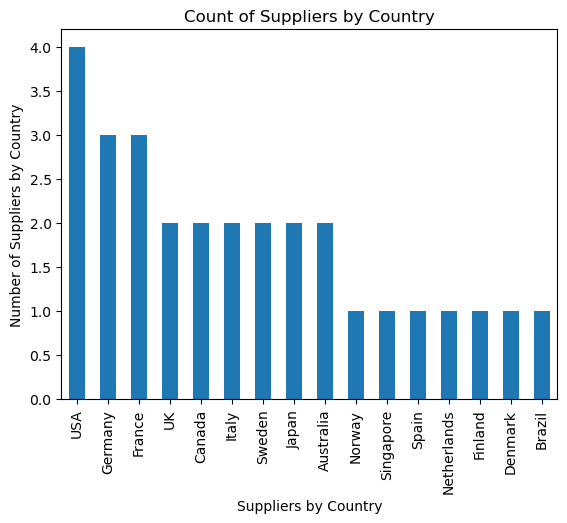

<Figure size 640x480 with 0 Axes>

In [14]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(my_tuple, columns=['Country', 'Country_Count'])

# TODO: Generate a visualization on this dataframe
df.sort_values(by='Country_Count', ascending=False).plot(kind='bar', x='Country', y='Country_Count', legend=False)
plt.xlabel('Suppliers by Country')
plt.ylabel('Number of Suppliers by Country')
plt.title('Count of Suppliers by Country')
plt.show()
plt.savefig('Count of Supplers.png')

### Question 3 : Most Frequent Country by Customer

What is the most common country of origin in our Customers table? Sort your output in descending order.

- The most common counry of orgin in the Customers table is that of the **United States** with **13** customers. 

**Hint**: `GROUP BY` can be used to calculate grouped aggregates.

In [7]:
# TODO: Write a SQL query which will answer the question above.

cursor.execute("""
    SELECT Country, COUNT(Country) As Common_country
    FROM Customers
    Group BY Country
    ORDER BY COUNT(Country) DESC;
""")

# TODO: Fetch your list of tuples and print it out

rows = cursor.fetchall()
print(rows)

for com in rows:
    print(com)

[('USA', 13), ('Germany', 11), ('France', 11), ('Brazil', 9), ('UK', 7), ('Spain', 5), ('Mexico', 5), ('Venezuela', 4), ('Italy', 3), ('Canada', 3), ('Argentina', 3), ('Switzerland', 2), ('Sweden', 2), ('Portugal', 2), ('Finland', 2), ('Denmark', 2), ('Belgium', 2), ('Austria', 2), ('Poland', 1), ('Norway', 1), ('Ireland', 1)]
('USA', 13)
('Germany', 11)
('France', 11)
('Brazil', 9)
('UK', 7)
('Spain', 5)
('Mexico', 5)
('Venezuela', 4)
('Italy', 3)
('Canada', 3)
('Argentina', 3)
('Switzerland', 2)
('Sweden', 2)
('Portugal', 2)
('Finland', 2)
('Denmark', 2)
('Belgium', 2)
('Austria', 2)
('Poland', 1)
('Norway', 1)
('Ireland', 1)


In [8]:
# Creating a tuple that displays the common supplier countries
Country_tuple = (('USA', 13), ('Germany', 11), ('France', 11), ('Brazil', 9), ('UK', 7), ('Spain', 5), ('Mexico', 5), ('Venezuela', 4), ('Italy', 3), ('Canada', 3), ('Argentina', 3), ('Switzerland', 2), ('Sweden', 2), ('Portugal', 2), ('Finland', 2), ('Denmark', 2), ('Belgium', 2), ('Austria', 2), ('Poland', 1), ('Norway', 1), ('Ireland', 1))


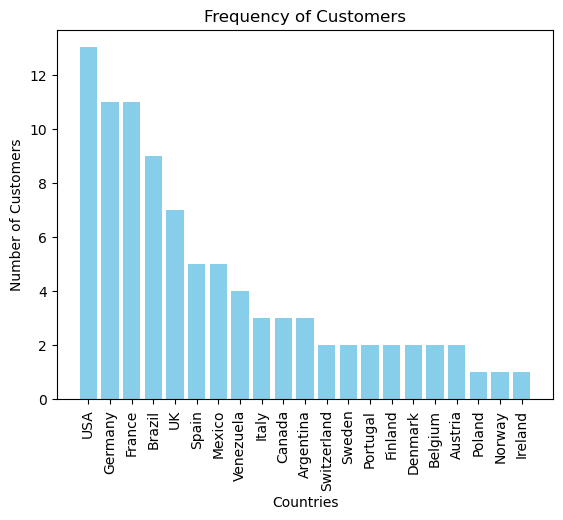

<Figure size 640x480 with 0 Axes>

In [15]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(Country_tuple, columns=['Country','Common_Country'])

# TODO: Generate a visualization on this dataframe

plt.bar(df['Country'], df['Common_Country'], color='skyblue')
plt.title ('Frequency of Customers')
plt.xticks(rotation=90)
plt.xlabel('Countries')
plt.ylabel('Number of Customers')
plt.show()
plt.savefig('Frequency of Customers by Country.png')

### Question 4 : Least Popular Products by Quantity

What are the least popular products by order quantity? Limit your output to the bottom 20 products. Sort this table in ascending order and be sure to include the product name in your output and visualizations.

 - The 3 least popular products bsed on order quantity still avaliable:

1) Schoggi Schokolade and Louisiana Hot Spiced Okra (**Quantity = 90 products**)
2) Ikura (**Quantity = 85 products**)
3) Aniseed Syrup(**Quantity = 80 products**)


**Hint**: You will have to perform a join to calculate this answer.

In [24]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
    SELECT p.ProductName, SUM(od.Quantity) as Least_Popular
    FROM OrderDetails as od
    Join Products as p
    ON od.ProductId = p.ProductId
    GROUP BY p.ProductName
    ORDER BY Least_Popular ASC
    LIMIT 20
""")

# TODO: Fetch your list of tuples and print it out

rows = cursor.fetchall()
print(rows)

for Q in rows:
    print(Q)


[('Laughing Lumberjack Lager', 5), ('Røgede sild', 15), ("Gustaf's Knäckebröd", 18), ('Mishi Kobe Niku', 20), ('Genen Shouyu', 25), ("Uncle Bob's Organic Dried Pears", 25), ('Queso Manchego La Pastora', 27), ("Grandma's Boysenberry Spread", 36), ('Gravad lax', 39), ('Röd Kaviar', 45), ('Filo Mix', 48), ('Mascarpone Fabioli', 52), ('Chocolade', 70), ('Valkoinen suklaa', 70), ('NuNuCa Nuß-Nougat-Creme', 71), ('Singaporean Hokkien Fried Mee', 77), ('Aniseed Syrup', 80), ('Ikura', 85), ('Louisiana Hot Spiced Okra', 90), ('Schoggi Schokolade', 90)]
('Laughing Lumberjack Lager', 5)
('Røgede sild', 15)
("Gustaf's Knäckebröd", 18)
('Mishi Kobe Niku', 20)
('Genen Shouyu', 25)
("Uncle Bob's Organic Dried Pears", 25)
('Queso Manchego La Pastora', 27)
("Grandma's Boysenberry Spread", 36)
('Gravad lax', 39)
('Röd Kaviar', 45)
('Filo Mix', 48)
('Mascarpone Fabioli', 52)
('Chocolade', 70)
('Valkoinen suklaa', 70)
('NuNuCa Nuß-Nougat-Creme', 71)
('Singaporean Hokkien Fried Mee', 77)
('Aniseed Syrup', 

In [ ]:
# Creating a tuple that displays the least populart prodcuts based on the quantity
least_pop_product = ('Laughing Lumberjack Lager', 5), ('Røgede sild', 15), ("Gustaf's Knäckebröd", 18), ('Mishi Kobe Niku', 20), ('Genen Shouyu', 25), ("Uncle Bob's Organic Dried Pears", 25), ('Queso Manchego La Pastora', 27), ("Grandma's Boysenberry Spread", 36), ('Gravad lax', 39), ('Röd Kaviar', 45), ('Filo Mix', 48), ('Mascarpone Fabioli', 52), ('Chocolade', 70), ('Valkoinen suklaa', 70), ('NuNuCa Nuß-Nougat-Creme', 71), ('Singaporean Hokkien Fried Mee', 77), ('Aniseed Syrup', 80), ('Ikura', 85), ('Louisiana Hot Spiced Okra', 90), ('Schoggi Schokolade', 90)


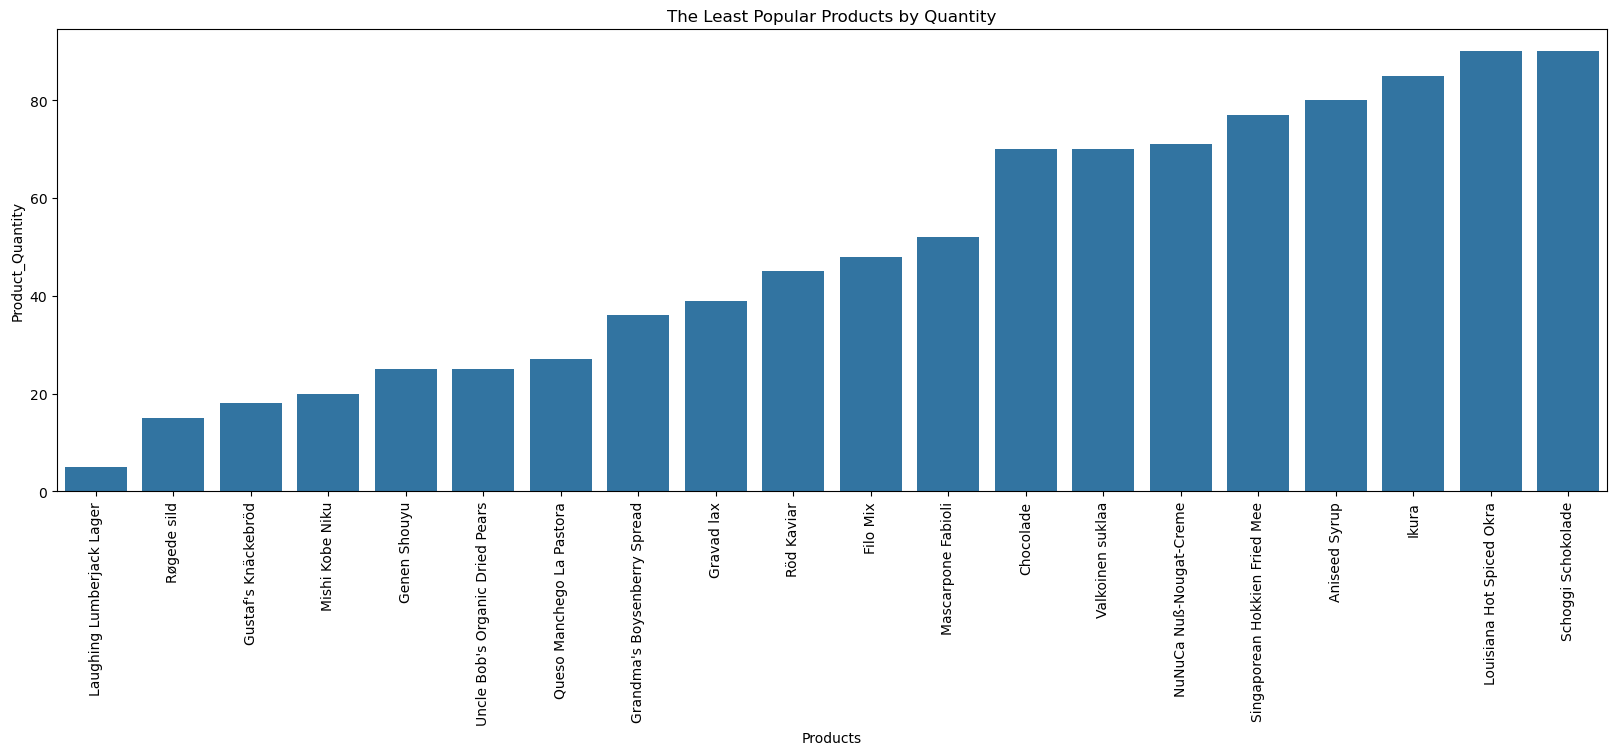

<Figure size 640x480 with 0 Axes>

In [26]:
# TODO: Convert your list of tuples to a dataframe

df = pd.DataFrame(least_pop_product, columns=['Products','Product_Quantity'])

# TODO: Generate a visualization on this dataframe
plt.figure(figsize =(20,6))
sns.barplot(x='Products', y='Product_Quantity', data=df)
plt.xticks(rotation=90)
plt.title('The Least Popular Products by Quantity')
plt.show()
plt.savefig('The Least Popular Products by Quantity.png')

### Question 5 : Least Popular Products by Revenue

What are the least popular products by **total revenue** (order quantity * price)? Sort this table in ascending order and be sure to include the product name in your output and visualizations.

**Hint**: You will have to perform a join to calculate this answer.

In [ ]:
# TODO: Write a SQL query which will answer the question above.
...

# TODO: Fetch your list of tuples and print it out
...

In [ ]:
# TODO: Convert your list of tuples to a dataframe
...

# TODO: Generate a visualization on this dataframe
...

### Question 6 : Countries with the Most Orders

Which country's have placed the most orders? For each country, list its' name in your output and visualizations.

**Hint**: You will have to perform a join to calculate this answer.

In [ ]:
# TODO: Write a SQL query which will answer the question above.
...

# TODO: Fetch your list of tuples and print it out
...

In [ ]:
# TODO: Convert your list of tuples to a dataframe
...

# TODO: Generate a visualization on this dataframe
...

### Question 7 : Countries with Customers Who Do Not Order

Which countries have at least one customer who has placed **no** orders? Count up the total number of customers who have placed no orders for each respective country. For each country, list its' name in your output and visualizations.

**Hint**: A join is necessary. We can also check if a column is `NULL` using the `IS` keyword.

In [ ]:
# TODO: Write a SQL query which will answer the question above.
...

# TODO: Fetch your list of tuples and print it out
...

In [ ]:
# TODO: Convert your list of tuples to a dataframe
...

# TODO: Generate a visualization on this dataframe
...

### Question 8 : Most Popular Suppliers

What are the most popular suppliers according to order count? List the supplier names and their number of orders. Sort your output in descending order.

**Hint**: You might need to use a subquery to join more than 2 tables together.

In [ ]:
# TODO: Write a SQL query which will answer the question above.
...

# TODO: Fetch your list of tuples and print it out
...

In [ ]:
# TODO: Convert your list of tuples to a dataframe
...

# TODO: Generate a visualization on this dataframe
...

## Report

Answer the following analytical questions using numerical evidence.

### Question 1

Which countries have the greatest number of customers? How does this correlate with the number of suppliers by country (i.e. do more customers lead to less or more suppliers)? Which evidence supports your answer?

[Answer Here]

### Question 2

What is the least popular product by order quantity? How does this correlate with revenue (i.e. do less popular products by quantity lead to less or more revenue)? Which evidence supports your answer?

[Answer Here]

### Question 3

Which country has the most orders? How does this correlate with the number of customers who do not order (i.e. do countries with more ordering customers have more or less non-ordering customers)? Which evidence supports your answer?

[Answer Here]

### Question 4

Which supplier has the most orders? Which evidence supports your answer?

[Answer Here]